### **D2APR: Aprendizado de Máquina e Reconhecimento de Padrões** (IFSP, Campinas) <br/>
**Trabalho 1 - Sao Paulo Real Estate**

Aluno: Hugo Martinelli Watanuki

Matrícula: 3016692

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>. <br/><br/>

In [12]:
# Imports and default settings for plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

#**1. Problem description and dataset**

##1.1 Problem statement
Stablishing the correct rental value for an apartment in Sao Paulo can be very challenging.

Irrespective of you being the owner or the tenant of the apartment, both parties want to ensure they are practicing prices that are in accordance with the most up to date values being practiced in the market.

However, the rental prices in a large metropolitan area like São Paulo can be influenced by serveral different factors, including not only internal attributes of the apartment, such as square footage and number of bedrooms,but also external elements such as its localization and surrounding infrastructure.

Therefore, the goal of this notebook is to develop a machine learning model that can help owner and tenants interested in renting an apartment to predict the a reference rental price according to the market standards. To this aim, a dataset containing records of apartments from Sao Paulo and their corresponding attributes will be leveraged.





##1.2 Dataset overview

The dataset being leveraged in this notebook is available from kaggle: https://www.kaggle.com/datasets/argonalyst/sao-paulo-real-estate-sale-rent-april-2019/

The dataset contains around 13,640 records where each instance represent an apartment either for sale or for rent in the city of São Paulo, Brazil. The data comes from multiple sources, specially real estate classified websites.

The dataset represents properties advertised in the month of April 2019.


In [40]:
# Loading the dataset
housing = pd.read_csv('./sample_data/sao-paulo-properties-april-2019.csv')

In [4]:
# Visualizing the dataset
housing.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


##1.3 Dataset attributes and data types

Each instance of the dataset corresponds to one apartment and is represented by 16 attributes (9 numeric and 7 categorical).

*   Price: Final price advertised (R$ Brazilian Real)
*   Condo: Condominium expenses (unknown values are marked as zero)
*   Size: The property size in Square Meters m² (private areas only)
*   Rooms: Number of bedrooms
*   Toilets: Number of toilets (all toilets)
*   Suites: Number of bedrooms with a private bathroom (en suite)
*   Parking: Number of parking spots
*   Elevator: Binary value: 1 if there is elevator in the building, 0 otherwise
*   Furnished: Binary value: 1 if the property is funished, 0 otherwise
*   Swimming Pool: Binary value: 1 if the property has swimming pool, 0 otherwise
*   New: Binary value: 1 if the property is very recent, 0 otherwise
*   District: The neighborhood and city where the property is located, e.i: Itaim Bibi/São Paulo
*   Negotiation Type: Sale or Rent
*   Property Type: The property type
*   Latitude: Geographic location
*   Longitude: Geographic location

There are no missing values reported in any of the features, but the feature "Condo" has unknown values represented as zero.


In [5]:
# Attributes and their types
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13640 non-null  int64  
 1   Condo             13640 non-null  int64  
 2   Size              13640 non-null  int64  
 3   Rooms             13640 non-null  int64  
 4   Toilets           13640 non-null  int64  
 5   Suites            13640 non-null  int64  
 6   Parking           13640 non-null  int64  
 7   Elevator          13640 non-null  int64  
 8   Furnished         13640 non-null  int64  
 9   Swimming Pool     13640 non-null  int64  
 10  New               13640 non-null  int64  
 11  District          13640 non-null  object 
 12  Negotiation Type  13640 non-null  object 
 13  Property Type     13640 non-null  object 
 14  Latitude          13640 non-null  float64
 15  Longitude         13640 non-null  float64
dtypes: float64(2), int64(11), object(3)
memo

#**2. Exploratory data analysis**

##2.1 Distribution of each attribute

In [41]:
# Filtering only the records for rent
housing_rent=housing[housing['Negotiation Type']=='rent']
housing_rent

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,3700,595,73,1,2,1,1,0,0,1,0,Brooklin/São Paulo,rent,apartment,-23.617682,-46.694963
11206,21000,3000,208,4,4,3,3,1,1,1,0,Brooklin/São Paulo,rent,apartment,-23.606891,-46.695934
11207,3800,710,55,1,1,0,1,0,1,1,0,Brooklin/São Paulo,rent,apartment,0.000000,0.000000
11208,5000,2354,205,3,2,1,2,1,0,0,0,Brooklin/São Paulo,rent,apartment,-23.612287,-46.681482


In [42]:
housing_rent['Negotiation Type'].value_counts()

rent    7228
Name: Negotiation Type, dtype: int64

In [43]:
housing['Property Type'].value_counts()

apartment    13640
Name: Property Type, dtype: int64

In [44]:
# Descriptive statistics of each attribute
housing_rent.describe(include='all')

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
count,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228,7228,7228,7228.000000,7228.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94,1,1,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mooca/São Paulo,rent,apartment,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178,7228,7228,NaN,NaN
mean,3077.669065,825.194798,89.486165,2.304234,2.105562,1.024488,1.452269,0.299806,0.172939,0.487963,0.000830,NaN,NaN,NaN,-22.032278,-43.500873
std,3522.830284,835.621937,63.976416,0.829108,0.998162,0.884241,0.889535,0.458205,0.378220,0.499890,0.028802,NaN,NaN,NaN,5.962534,11.675070
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,-46.749039,-58.364352
25%,1350.000000,395.750000,52.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,-23.598066,-46.689788
50%,2000.000000,595.000000,67.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,-23.555869,-46.644793
75%,3300.000000,990.000000,100.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,NaN,NaN,NaN,-23.522756,-46.585110


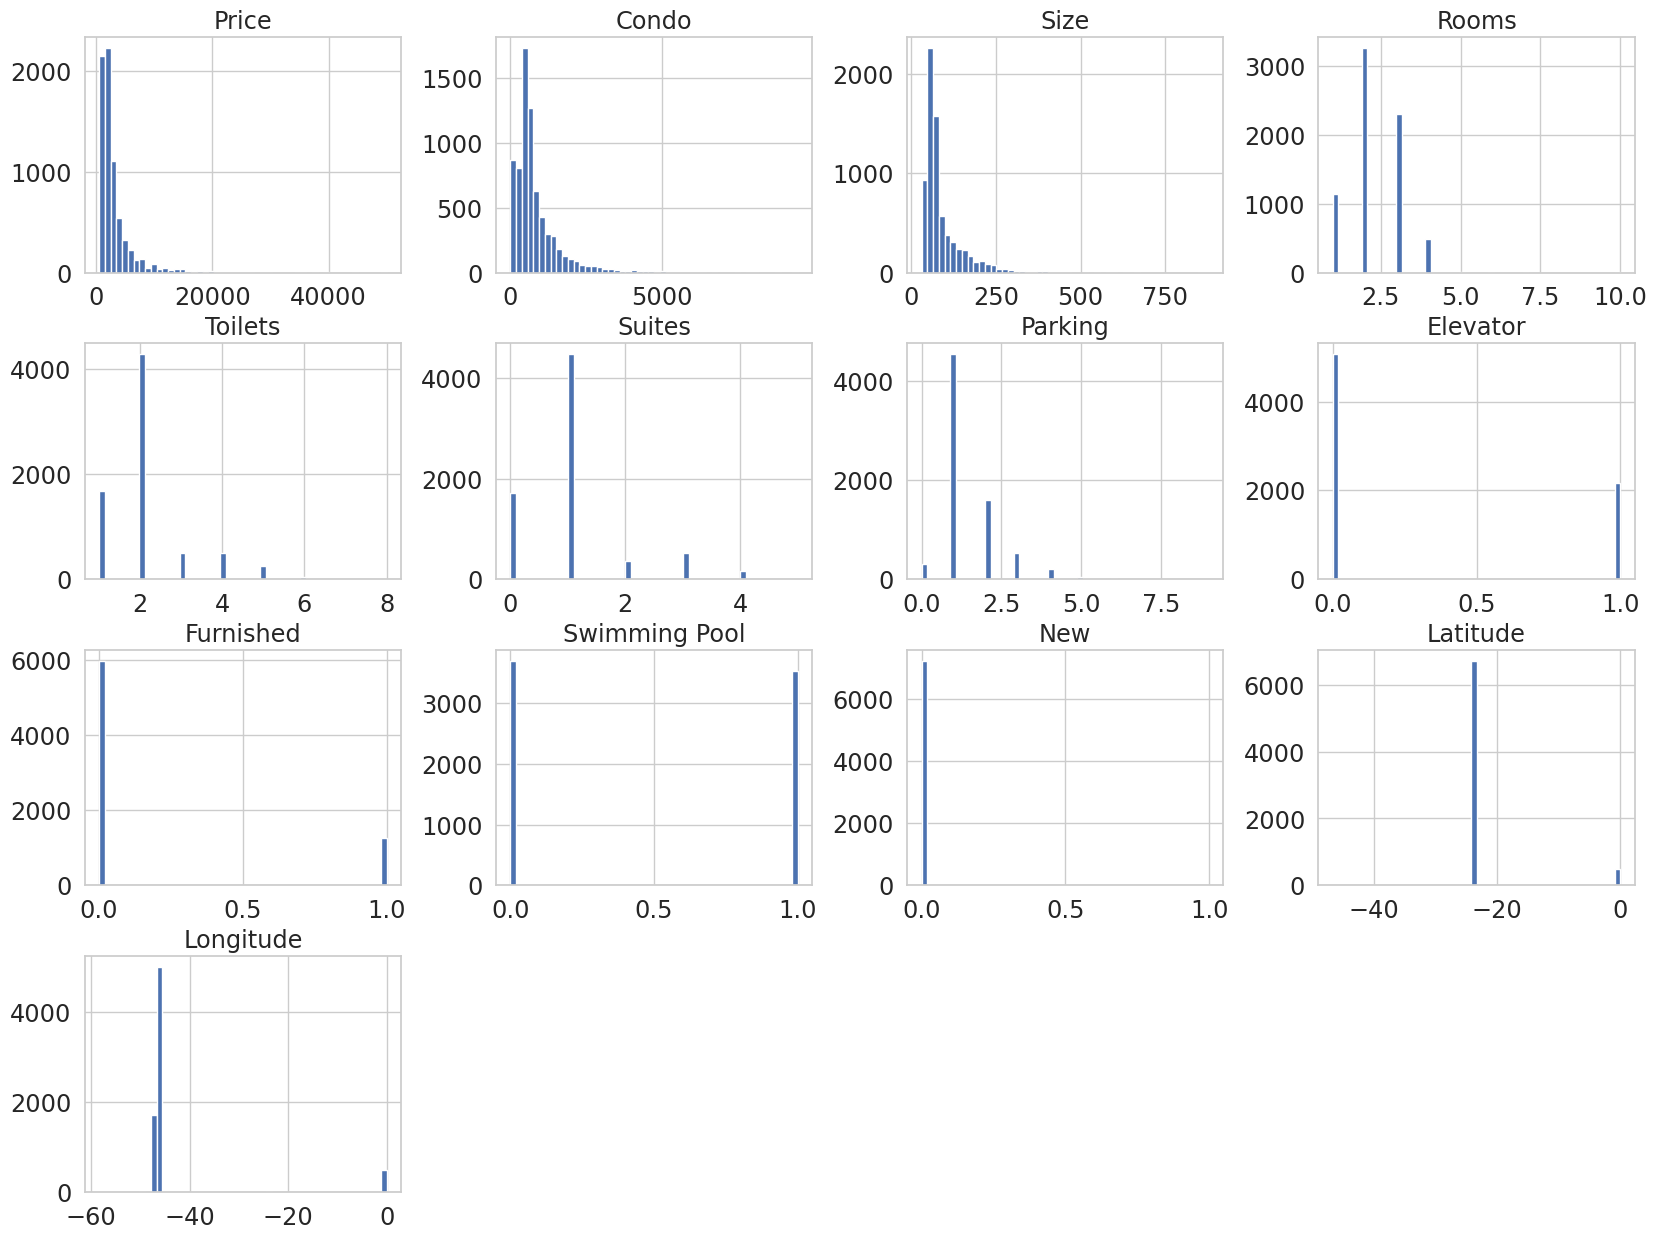

In [45]:
# Plotting an histogram for each numeric attibute from the dataframe
housing_rent.hist(bins=50, figsize=(20,15))
display()  # just to avoid texts in the notebook output

In [22]:
#
housing_rent['District'].value_counts()

Mooca/São Paulo              178
Moema/São Paulo              163
Vila Mariana/São Paulo       161
Morumbi/São Paulo            159
Pinheiros/São Paulo          153
                            ... 
Lajeado/São Paulo              8
Guaianazes/São Paulo           6
Parque do Carmo/São Paulo      6
Jardim São Luis/São Paulo      3
Grajaú/São Paulo               2
Name: District, Length: 94, dtype: int64

##2.2 Correlation among each numeric attribute

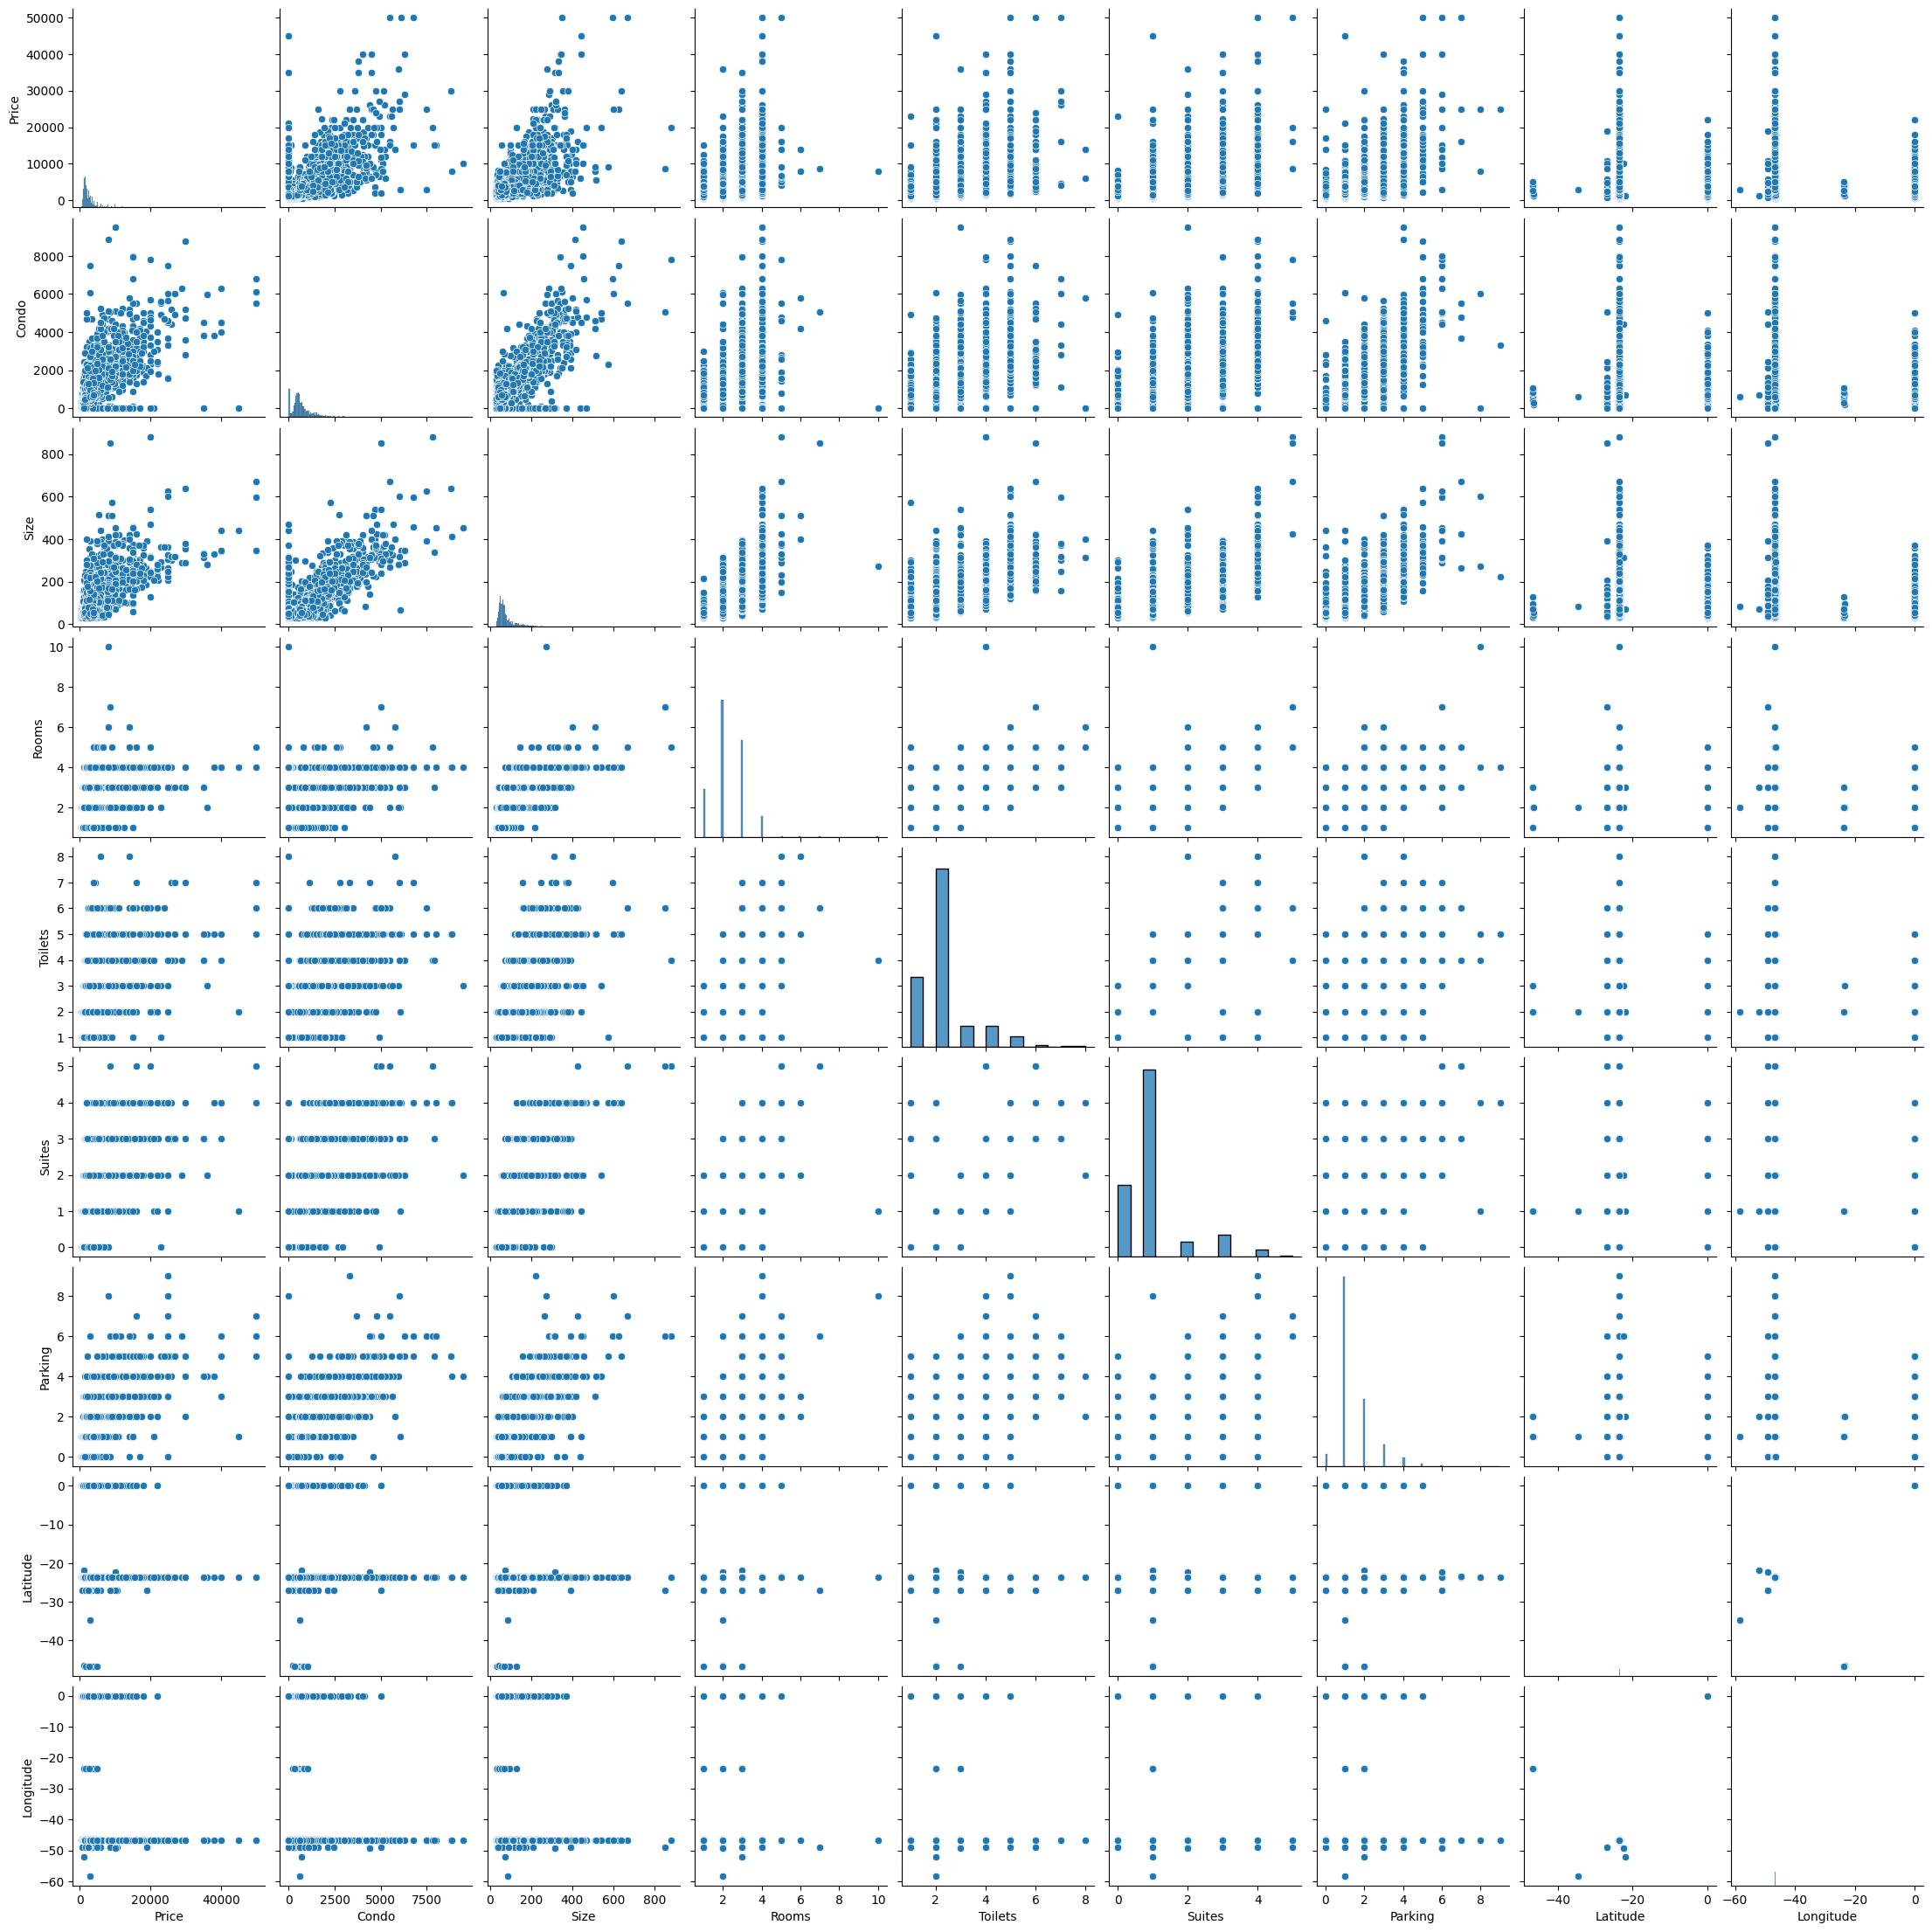

In [11]:
# 9 numeric attributes ==> 9 x 9 = 81 plots
sns.pairplot(housing_rent, vars=["Price","Condo","Size","Rooms","Toilets","Suites","Parking","Latitude","Longitude"])

<ipython-input-16-1bd6b8d08285>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(housing_rent.corr(numeric_only=True), dtype=np.bool))  # creates a triangular matrix based on the pandas correlation matrix


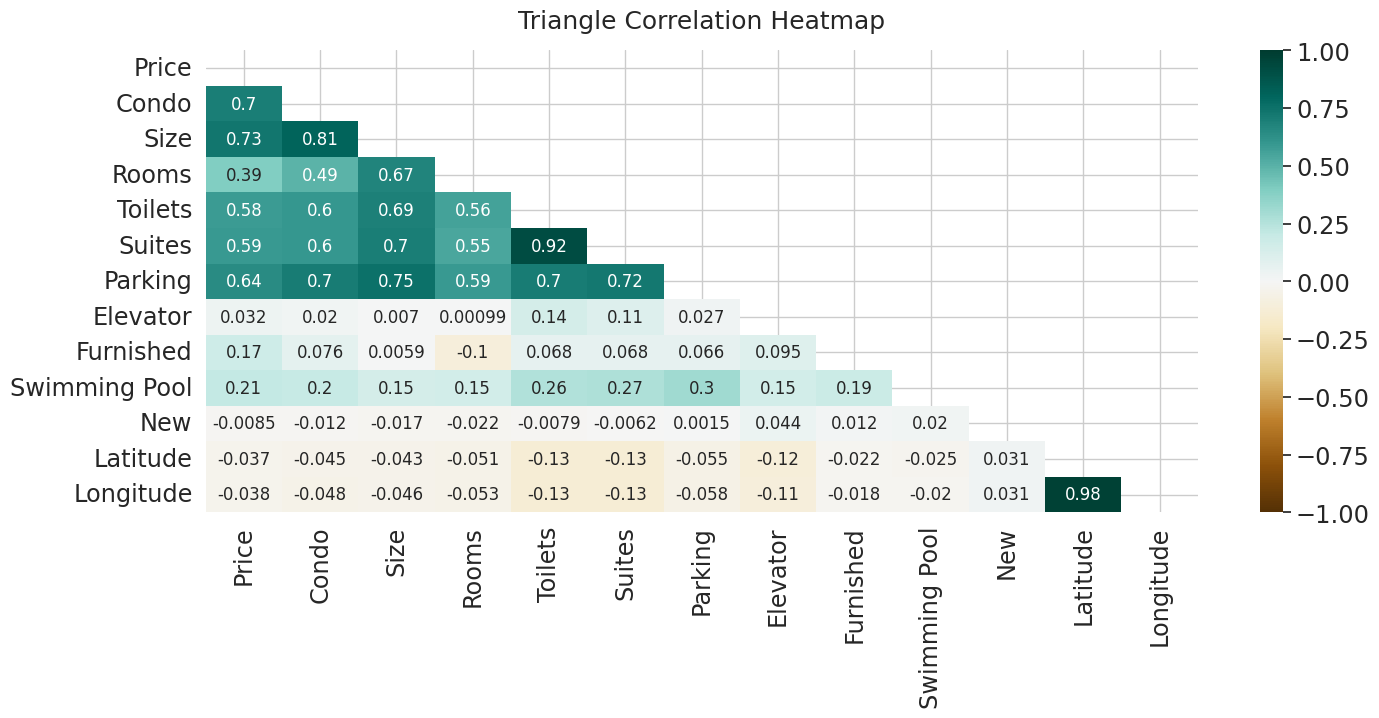

In [16]:
# Plotting the correlation coeficients as a heatmap
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(housing_rent.corr(numeric_only=True), dtype=np.bool))  # creates a triangular matrix based on the pandas correlation matrix

heatmap = sns.heatmap(housing_rent.corr(numeric_only=True), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [17]:
# Sorting the attributes by descending order of correlation
housing_rent.corr(numeric_only=True)["Price"].sort_values(ascending=False)

Price            1.000000
Size             0.731795
Condo            0.700361
Parking          0.640743
Suites           0.588329
Toilets          0.583488
Rooms            0.390951
Swimming Pool    0.206884
Furnished        0.171859
Elevator         0.031860
New             -0.008477
Latitude        -0.036935
Longitude       -0.038362
Name: Price, dtype: float64

<Figure size 1000x600 with 0 Axes>

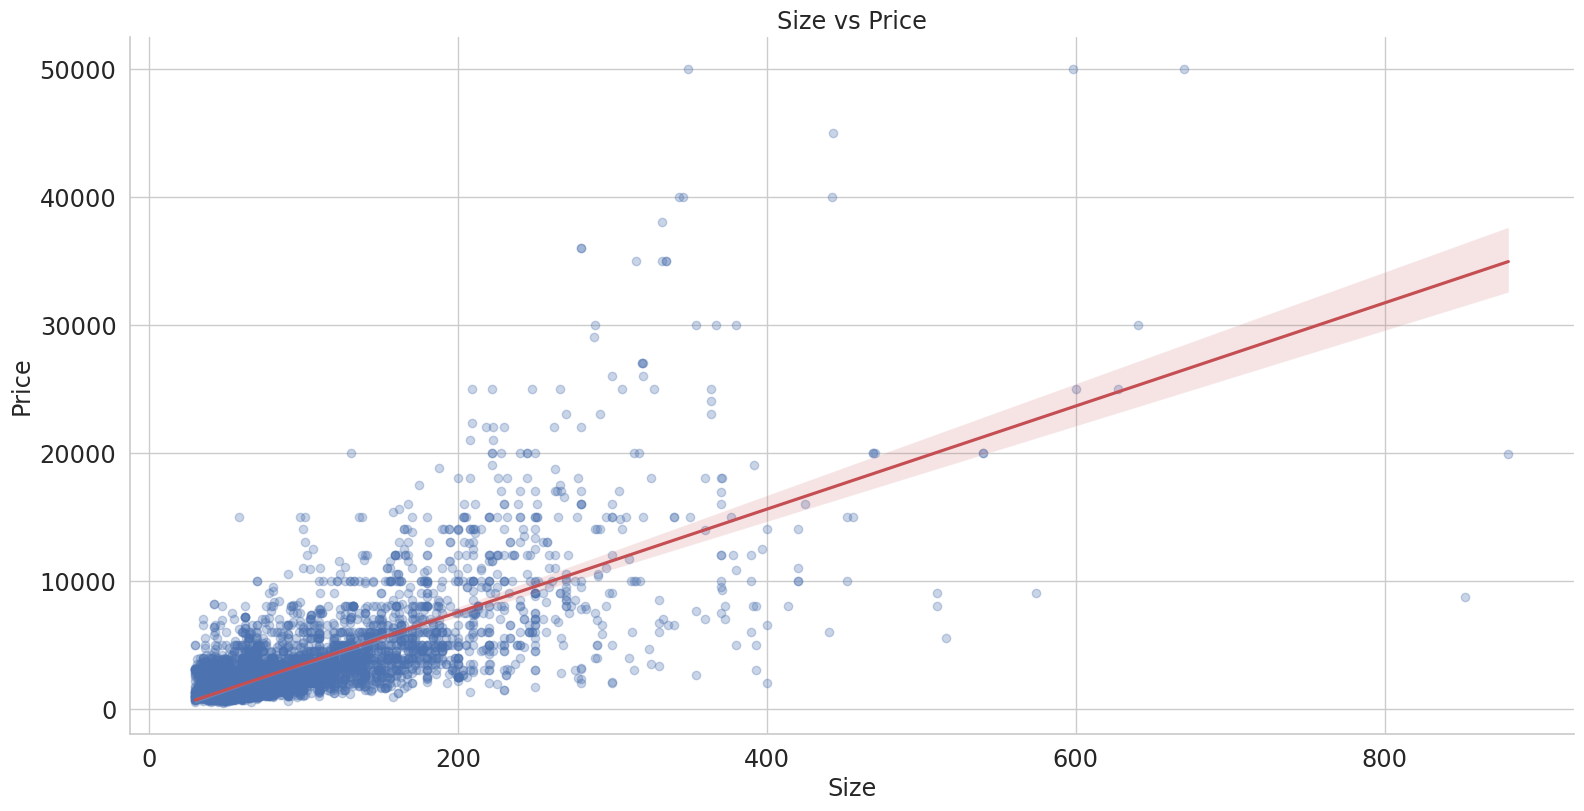

In [19]:
# Plotting the correlation between apartment size and rental price
plt.figure(figsize=(10, 6))
sns.lmplot(data=housing_rent, x="Size", y="Price", aspect=2, height=8, scatter_kws={'alpha': 0.3}, line_kws={'color': 'r'})
plt.grid(True)
plt.title('Size vs Price')
display()

##2.3 Auxiliary graphics for exploratory analysis

<Axes: xlabel='Longitude', ylabel='Latitude'>

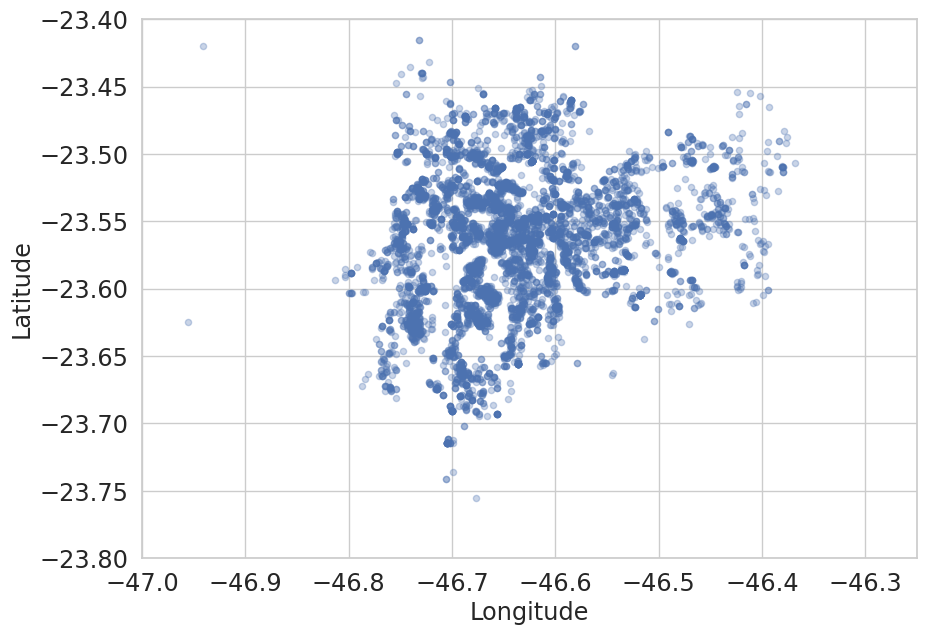

In [14]:
# Visualizing the geographical distribution of the apartments
housing_rent.plot(kind="scatter", x="Longitude", y="Latitude", xlim=(-47,-46.25), ylim=(-23.8, -23.4), alpha=0.3, figsize=(10, 7))

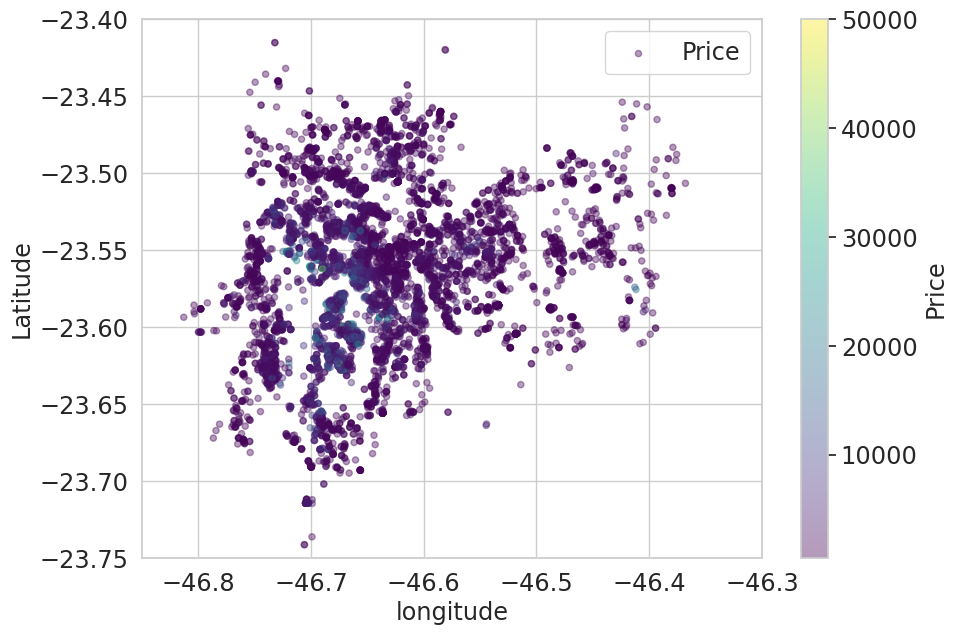

In [15]:
# Visualizing geographical distribution of the apartments and their prices
housing_rent.plot(kind="scatter", x="Longitude", y="Latitude", xlim=(-46.85,-46.3), ylim=(-23.75, -23.4), label ="Price", alpha=0.4,  figsize=(10,7), c="Price", cmap=plt.get_cmap("viridis"), colorbar=True)
plt.xlabel('longitude')
plt.legend()

In [24]:
housing_rent.columns

Index(['Price', 'Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking',
       'Elevator', 'Furnished', 'Swimming Pool', 'New', 'District', 'Latitude',
       'Longitude'],
      dtype='object')

In [26]:
numeric_attributes = ['Price', 'Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking', 'Latitude', 'Longitude']
numeric_attributes

['Price',
 'Condo',
 'Size',
 'Rooms',
 'Toilets',
 'Suites',
 'Parking',
 'Latitude',
 'Longitude']

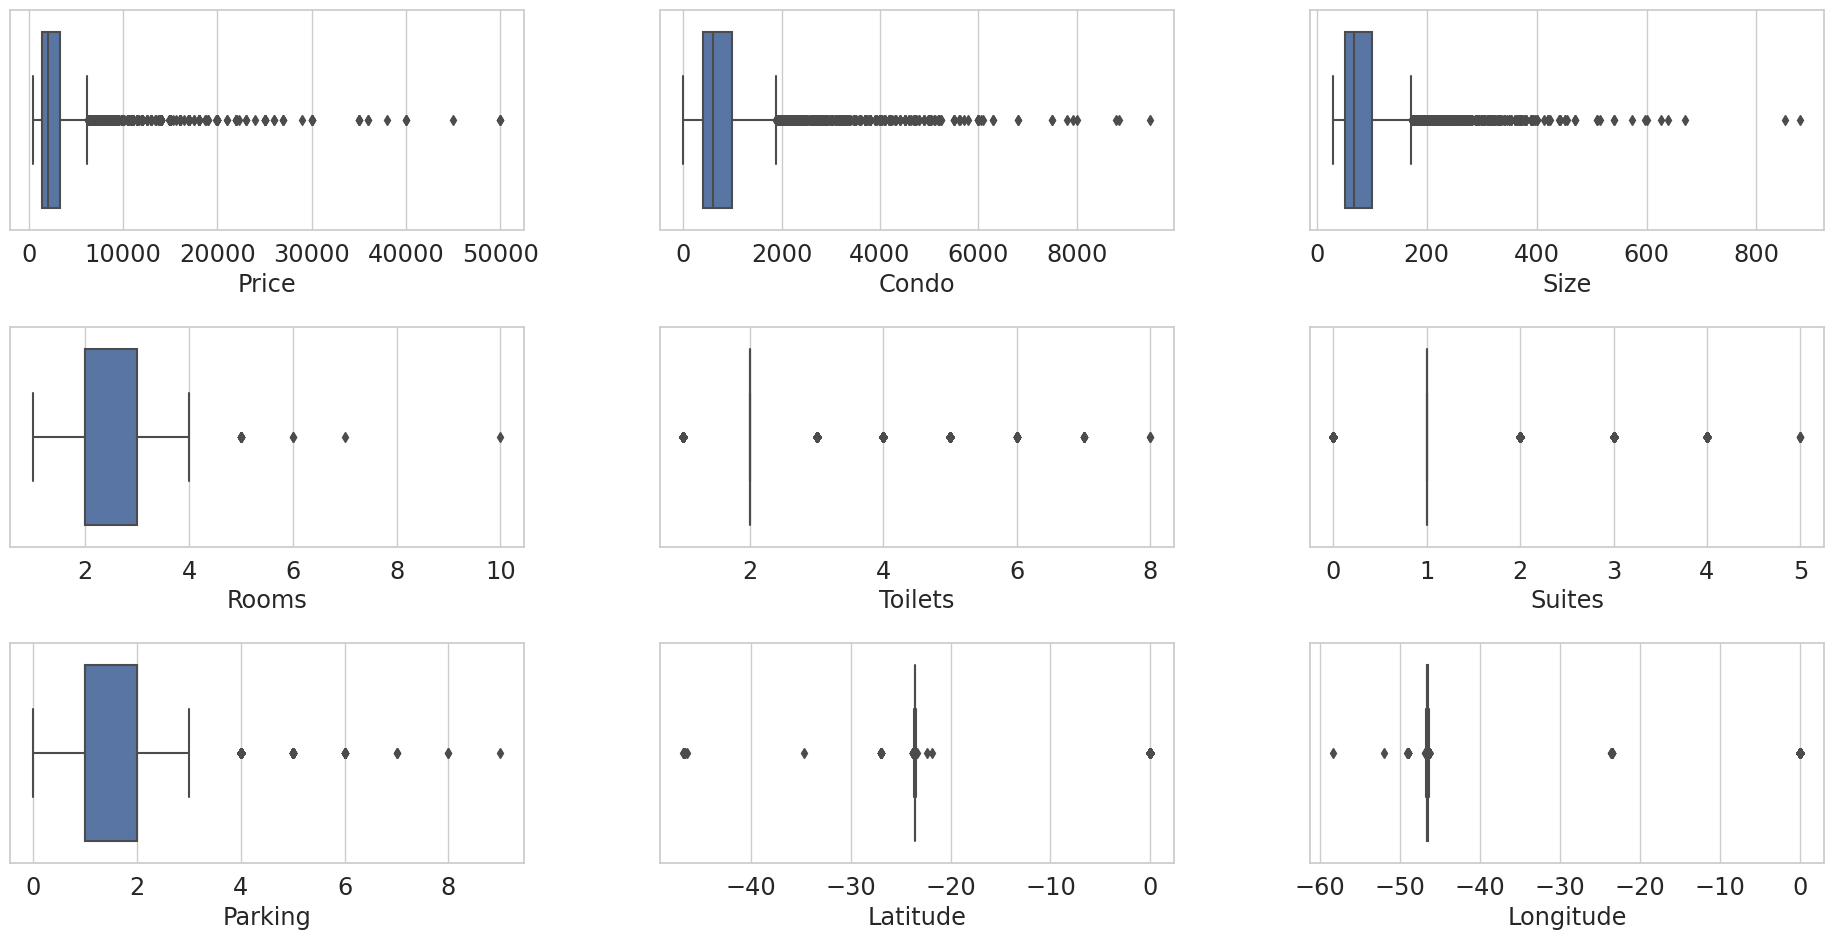

In [27]:
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
fig.tight_layout(pad=3.0)

for i, attr in enumerate(numeric_attributes):
    row = i // 3
    col = i % 3
    sns.boxplot(data=housing_rent, x=attr, ax=axes[row, col])

## 2.4 Main conclusions from the exploratory data analysis
1. Two columns have constant values and can be removed as they do not add balue to the analysis

2. Distrctit column is categorical and needs to be encoded

3. Size is the attirube with largest correlation and good predictor

4. Size is not uniformly distributed so stratified sampling might be requried to avoid vias.

5. Most expensive apartments are localted is the centra/west region

6. Outliers are present but they are real values

7.: One specific concern for the categorial variables is that their proportions in the population are not uniform and can generate bias if proper care is not taken during sampling

#**3. Cleaning and preprocessing the dataset**



##3.1 Slicing the dataset to remove unnecessary columns

In [46]:
# Dropping columns that do not add value to the analysis (i.e., constant values)
housing_rent=housing_rent.drop(columns=['Negotiation Type','Property Type'])
housing_rent

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,-23.525025,-46.482436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,3700,595,73,1,2,1,1,0,0,1,0,Brooklin/São Paulo,-23.617682,-46.694963
11206,21000,3000,208,4,4,3,3,1,1,1,0,Brooklin/São Paulo,-23.606891,-46.695934
11207,3800,710,55,1,1,0,1,0,1,1,0,Brooklin/São Paulo,0.000000,0.000000
11208,5000,2354,205,3,2,1,2,1,0,0,0,Brooklin/São Paulo,-23.612287,-46.681482


##3.2 Addressing missing values for the "Condo" attribute

In [47]:
housing_rent['Condo'].value_counts()

0       640
500     174
600     152
400     146
450     132
       ... 
3721      1
5636      1
1216      1
2820      1
2354      1
Name: Condo, Length: 1192, dtype: int64

<Axes: xlabel='Condo'>

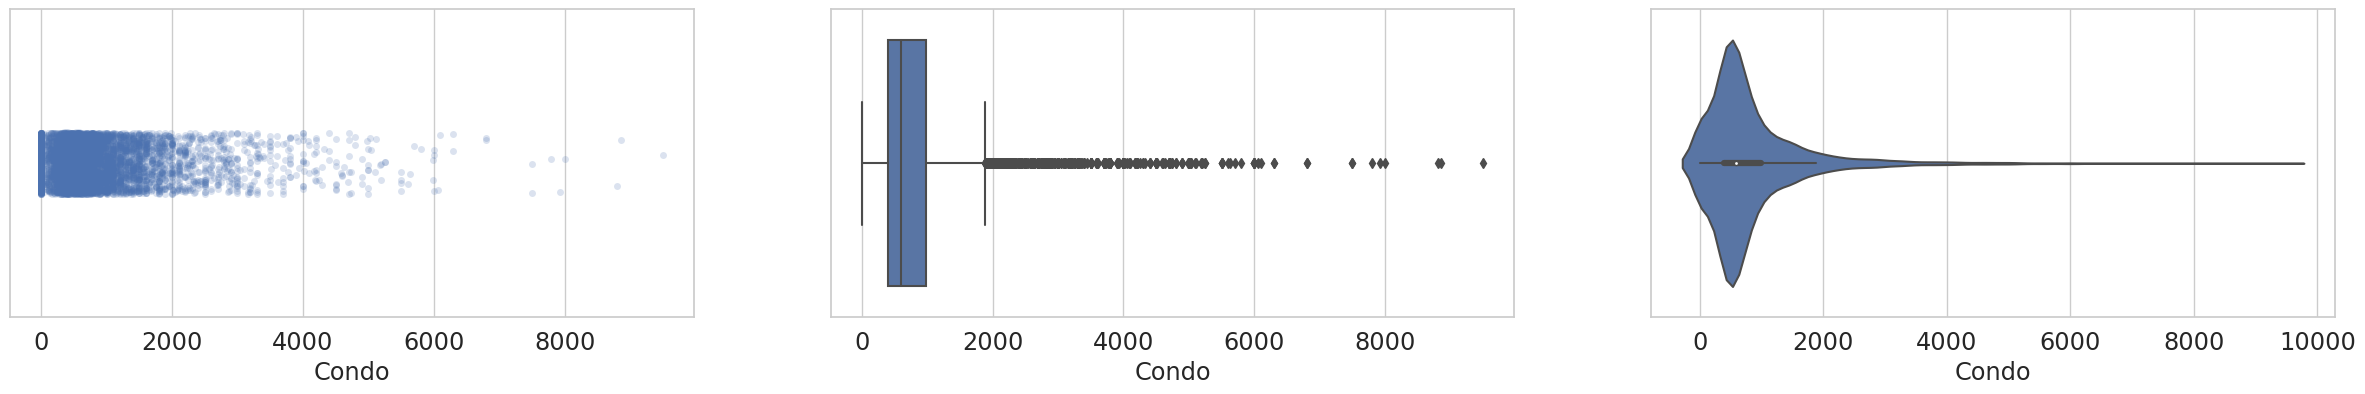

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(30, 4))

sns.stripplot(data=housing_rent, x='Condo', ax=axes[0], alpha=0.2)
sns.boxplot(data=housing_rent, x='Condo', ax=axes[1])
sns.violinplot(data=housing_rent, x='Condo', ax=axes[2])

In [50]:
housing_rent_clean = housing_rent.copy()

In [51]:
median_Condo = housing_rent_clean['Condo'].median()
median_Condo

595.0

In [52]:
mask_zeroes = housing_rent_clean[housing_rent_clean['Condo']==0]
mask_zeroes

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Latitude,Longitude
5,1170,0,50,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,-23.548751,-46.477195
8,1000,0,65,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,-23.548751,-46.477195
9,1000,0,100,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,-23.548751,-46.477195
49,1200,0,48,2,2,1,1,0,0,0,0,Cangaíba/São Paulo,-23.502336,-46.523243
50,1450,0,65,2,2,1,1,1,0,0,0,Cangaíba/São Paulo,-23.506197,-46.522358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10992,1600,0,50,2,1,0,1,1,0,0,0,Rio Pequeno/São Paulo,-23.565075,-46.750646
10993,1600,0,50,2,1,0,1,1,0,0,0,Rio Pequeno/São Paulo,-23.565075,-46.750646
11137,1650,0,40,1,2,1,1,0,1,0,0,Brooklin/São Paulo,-23.621386,-46.683703
11179,7900,0,153,3,2,1,3,0,1,1,0,Mooca/São Paulo,0.000000,0.000000


In [54]:
housing_rent_clean['Condo'] = housing_rent_clean['Condo'].replace(0, median_Condo)

In [55]:
mask_zeroes = housing_rent_clean[housing_rent_clean['Condo']==0]
mask_zeroes

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Latitude,Longitude


In [56]:
#housing_rent.loc[24]
housing_rent_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7228 entries, 0 to 11209
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          7228 non-null   int64  
 1   Condo          7228 non-null   int64  
 2   Size           7228 non-null   int64  
 3   Rooms          7228 non-null   int64  
 4   Toilets        7228 non-null   int64  
 5   Suites         7228 non-null   int64  
 6   Parking        7228 non-null   int64  
 7   Elevator       7228 non-null   int64  
 8   Furnished      7228 non-null   int64  
 9   Swimming Pool  7228 non-null   int64  
 10  New            7228 non-null   int64  
 11  District       7228 non-null   object 
 12  Latitude       7228 non-null   float64
 13  Longitude      7228 non-null   float64
dtypes: float64(2), int64(11), object(1)
memory usage: 847.0+ KB


#3.3 Enconding of the categorial variable "District"

In [58]:
housing_rent_clean['District'].value_counts()

Mooca/São Paulo              178
Moema/São Paulo              163
Vila Mariana/São Paulo       161
Morumbi/São Paulo            159
Pinheiros/São Paulo          153
                            ... 
Lajeado/São Paulo              8
Guaianazes/São Paulo           6
Parque do Carmo/São Paulo      6
Jardim São Luis/São Paulo      3
Grajaú/São Paulo               2
Name: District, Length: 94, dtype: int64

In [57]:
# one hot encoding by pandas
housing_rent_clean_encod = pd.get_dummies(data=housing_rent_clean, columns=['District'])
housing_rent_clean_encod.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,...,District_Vila Jacuí/São Paulo,District_Vila Leopoldina/São Paulo,District_Vila Madalena/São Paulo,District_Vila Maria/São Paulo,District_Vila Mariana/São Paulo,District_Vila Matilde/São Paulo,District_Vila Olimpia/São Paulo,District_Vila Prudente/São Paulo,District_Vila Sônia/São Paulo,District_Água Rasa/São Paulo
0,930,220,47,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000,148,45,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1000,100,48,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1000,200,48,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1300,410,55,2,2,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
# Persisting the removal of the columns
housing_rent_clean_encod.to_csv('./sample_data/housing_rent_clean_encod.csv', index=False)

##3.4 Preparing stratified samples

<Axes: xlabel='Size', ylabel='Count'>

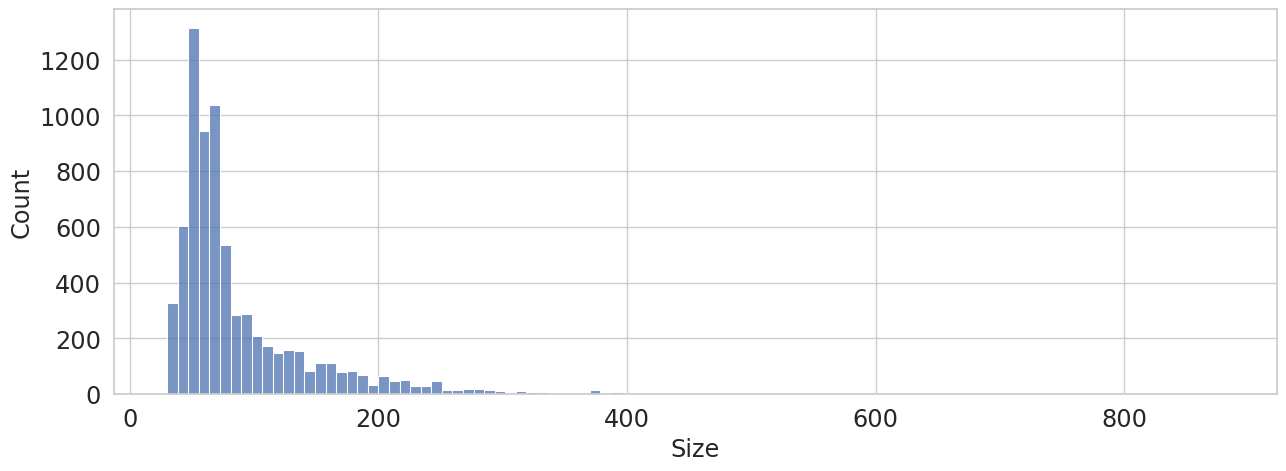

In [61]:
sns.histplot(data=housing_rent_clean_encod, x='Size', bins=100)

Group 1: [0, 50]
Group 2: (50, 100]
Group 3: (100, 150]
Group 4: (150, +]


In [62]:
housing_rent_clean_encod['Size'].describe()

count    7228.000000
mean       89.486165
std        63.976416
min        30.000000
25%        52.000000
50%        67.000000
75%       100.000000
max       880.000000
Name: Size, dtype: float64

In [63]:
housing_rent_clean_encod['Size_group'] = pd.cut(housing_rent_clean_encod['Size'], bins=[0, 50, 100, 150, np.inf],
                                        labels=[1, 2, 3, 4], include_lowest=True)

In [80]:
housing_rent.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude,Size_group
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486,1
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718,1
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665,1
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014,1
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436,2


In [64]:

housing_rent_clean_encod['Size_group'].value_counts()

2    3721
1    1727
4     920
3     860
Name: Size_group, dtype: int64

In [65]:
# proportional of the groups in the entire dataset
housing_rent_clean_encod['Size_group'].value_counts() / len(housing_rent_clean_encod['Size_group'])

2    0.514804
1    0.238932
4    0.127283
3    0.118982
Name: Size_group, dtype: float64

<Axes: xlabel='Size_group', ylabel='Count'>

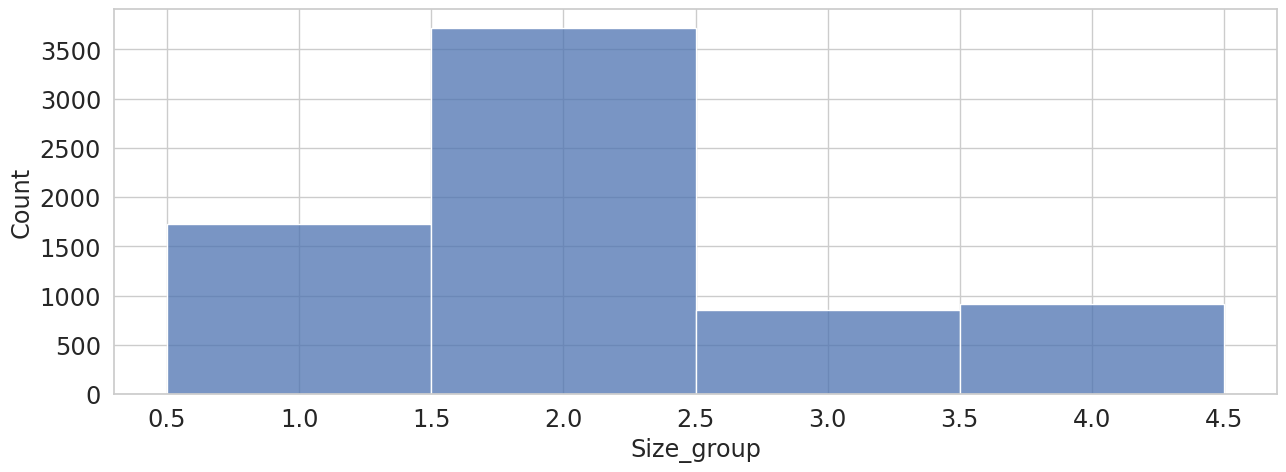

In [66]:

sns.histplot(housing_rent_clean_encod['Size_group'])


In [67]:
from sklearn.model_selection import train_test_split

housing_rent_train, housing_rent_test = train_test_split(housing_rent_clean_encod, test_size=0.2, stratify=housing_rent_clean_encod['Size_group'], random_state=42)

In [68]:
housing_rent_train.shape

(5782, 108)

In [69]:
housing_rent_train.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,...,District_Vila Leopoldina/São Paulo,District_Vila Madalena/São Paulo,District_Vila Maria/São Paulo,District_Vila Mariana/São Paulo,District_Vila Matilde/São Paulo,District_Vila Olimpia/São Paulo,District_Vila Prudente/São Paulo,District_Vila Sônia/São Paulo,District_Água Rasa/São Paulo,Size_group
10890,2100,597,78,3,2,1,2,0,0,1,...,0,0,0,0,0,0,0,0,0,2
10645,4000,1000,103,2,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3409,3500,620,49,1,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3778,4000,2700,111,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1938,2500,465,36,1,2,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1


In [70]:
# proportion of the groups in the training set
housing_rent_train['Size_group'].value_counts() / len(housing_rent_train['Size_group'])

2    0.514874
1    0.238845
4    0.127292
3    0.118990
Name: Size_group, dtype: float64

In [71]:
housing_rent_test.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,...,District_Vila Leopoldina/São Paulo,District_Vila Madalena/São Paulo,District_Vila Maria/São Paulo,District_Vila Mariana/São Paulo,District_Vila Matilde/São Paulo,District_Vila Olimpia/São Paulo,District_Vila Prudente/São Paulo,District_Vila Sônia/São Paulo,District_Água Rasa/São Paulo,Size_group
3331,4000,1123,160,3,4,3,3,0,0,1,...,0,0,0,0,0,0,0,0,0,4
3171,1500,971,95,3,2,1,2,0,0,1,...,0,0,0,0,0,0,0,0,0,2
10803,10000,2250,208,4,5,4,4,0,0,1,...,0,0,0,1,0,0,0,0,0,4
9205,2700,861,58,2,2,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,2
1203,5800,1169,110,2,2,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,3


In [72]:
housing_rent_test.shape

(1446, 108)

In [73]:
# proportion of the groups in the testing set
housing_rent_test['Size_group'].value_counts() / len(housing_rent_test['Size_group'])

2    0.514523
1    0.239281
4    0.127248
3    0.118949
Name: Size_group, dtype: float64

In [74]:
# removing the attribute 'median_income_group'
housing_rent_train = housing_rent_train.drop(columns=['Size_group'])
housing_rent_test = housing_rent_test.drop(columns=['Size_group'])

In [75]:
# if you want to keep the reference for the row indices from the original dataset, remove the index=False
housing_rent_train.to_csv('./sample_data/housing_rent_train.csv', index=False)
housing_rent_test.to_csv('./sample_data/housing_rent_test.csv', index=False)

#**4. Training and validating the model**

In [77]:
housing_rent_train.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,...,District_Vila Jacuí/São Paulo,District_Vila Leopoldina/São Paulo,District_Vila Madalena/São Paulo,District_Vila Maria/São Paulo,District_Vila Mariana/São Paulo,District_Vila Matilde/São Paulo,District_Vila Olimpia/São Paulo,District_Vila Prudente/São Paulo,District_Vila Sônia/São Paulo,District_Água Rasa/São Paulo
10890,2100,597,78,3,2,1,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10645,4000,1000,103,2,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3409,3500,620,49,1,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3778,4000,2700,111,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1938,2500,465,36,1,2,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [78]:
housing_rent_train_target = housing_rent_train['Price'].copy()  # y = 1D array
housing_rent_train_pre = housing_rent_train.drop(columns=['Price'])  # X = 2D array, feature matrix


6.1. Getting the independent (features) and dependent variables (outcome)

In [79]:
type(housing_rent_train_pre)

pandas.core.frame.DataFrame

In [80]:
type(housing_rent_train_target)

pandas.core.series.Series

In [81]:
# convert Pandas to numpy arrays
X_train = housing_rent_train_pre.values
y_train = housing_rent_train_target.values

In [82]:
housing_rent_train_pre.head()

,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,...,District_Vila Jacuí/São Paulo,District_Vila Leopoldina/São Paulo,District_Vila Madalena/São Paulo,District_Vila Maria/São Paulo,District_Vila Mariana/São Paulo,District_Vila Matilde/São Paulo,District_Vila Olimpia/São Paulo,District_Vila Prudente/São Paulo,District_Vila Sônia/São Paulo,District_Água Rasa/São Paulo
10890,597,78,3,2,1,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10645,1000,103,2,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3409,620,49,1,2,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3778,2700,111,2,2,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1938,465,36,1,2,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
X_train[:5]

array([[ 5.97000000e+02,  7.80000000e+01,  3.00000000e+00,
         2.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00, -2.35521376e+01, -4.67430944e+01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+0

In [84]:
X_train[:, 3]

array([2., 1., 2., ..., 2., 2., 2.])

In [85]:
y_train.shape

(5782,)

6.2. Training the Models

In [86]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()  # default hyperparameters

# training
lin_reg.fit(X_train, y_train)

LinearRegression()

6.3. Evaluating on the Training Set

In [87]:
y_train_pred = lin_reg.predict(X_train)

In [88]:
r2_score = lin_reg.score(X_train, y_train)
print(f'R2 = {r2_score}')

R2 = 0.6983442716688957


In [89]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_train, y_train_pred, squared=False)
print(f'RMSE = {rmse}')

RMSE = 1973.25673956387


Text(0.5, 1.0, 'Rent value - Prediction vs Real')

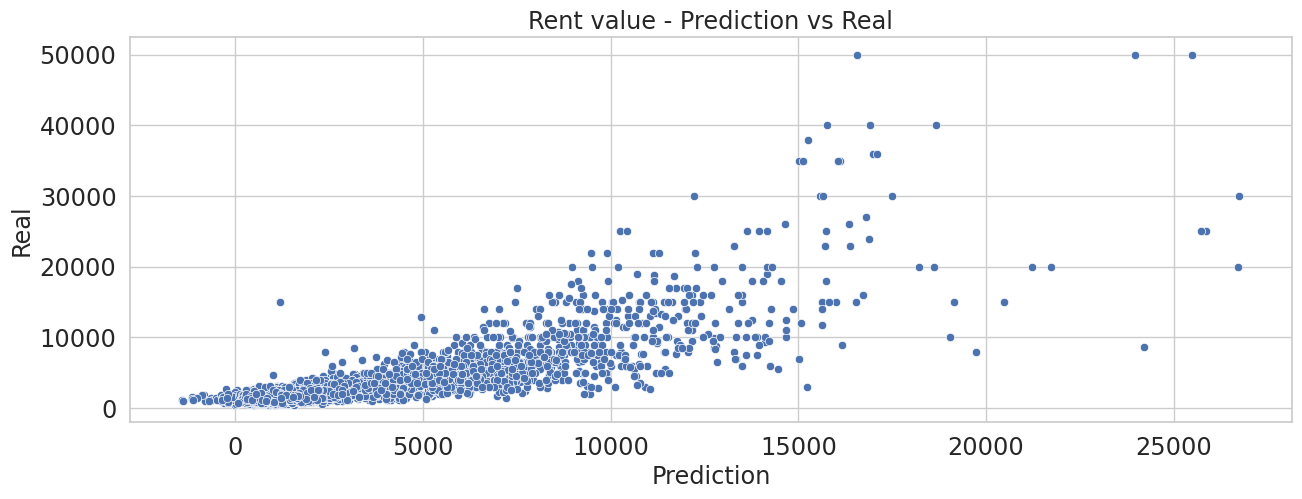

In [90]:
sns.scatterplot(x=y_train_pred, y=y_train)
plt.xlabel('Prediction')
plt.ylabel('Real')
plt.title('Rent value - Prediction vs Real')

In [91]:
residual = y_train - y_train_pred

Text(0.5, 1.0, 'Rent value - Prediction vs Residual')

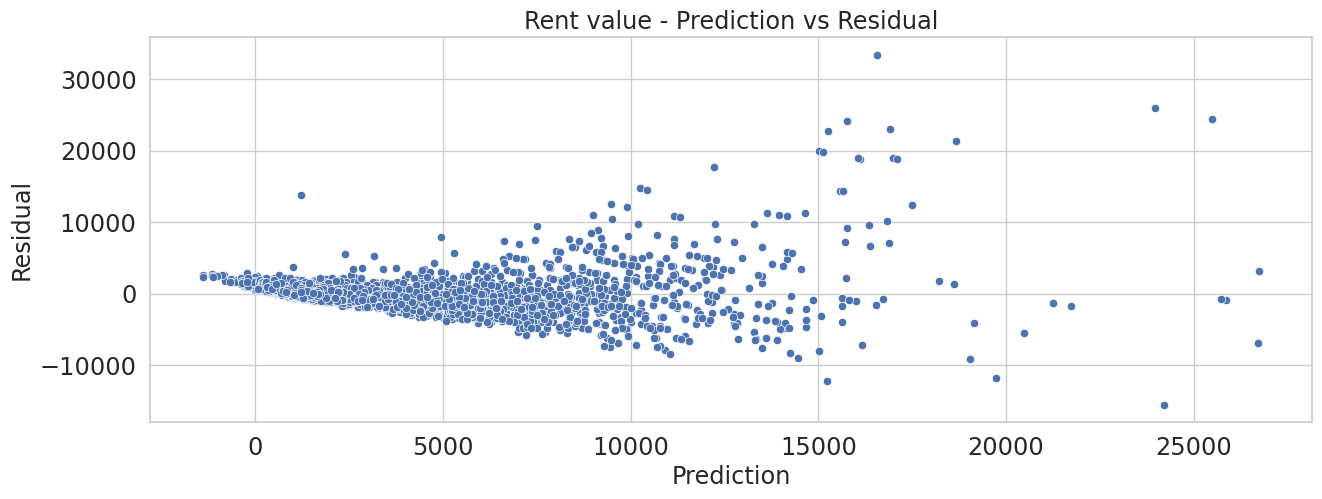

In [92]:
sns.scatterplot(x=y_train_pred, y=residual)
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.title('Rent value - Prediction vs Residual')

<Axes: ylabel='Count'>

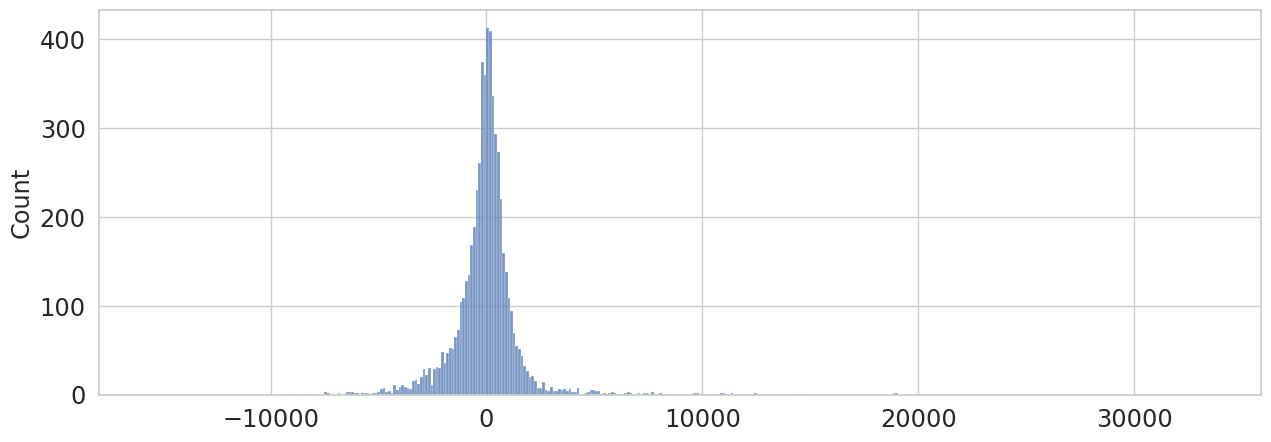

In [93]:
sns.histplot(residual)